# Lenet Implementation

The LeNet architecture is an excellent “first architecture” for Convolutional Neural Networks 

LeNet is small and easy to understand — yet large enough to provide interesting results. 

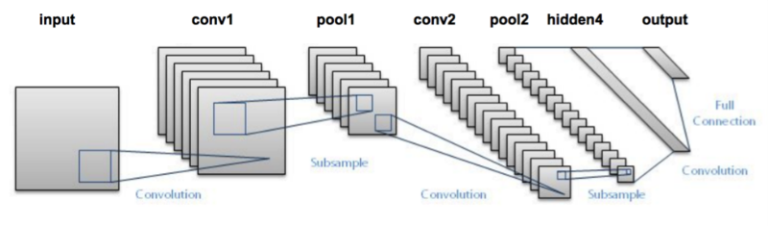

## mnist data set

The MNIST dataset is arguably the most well-studied, most understood dataset in the computer vision and machine learning literature, making it an excellent “first dataset” to use on your deep learning journey.

he goal of this dataset is to classify the handwritten digits 0-9. We’re given a total of 70,000 images, with (normally) 60,000 images used for training and 10,000 used for evaluation; however, we’re free to split this data as we see fit

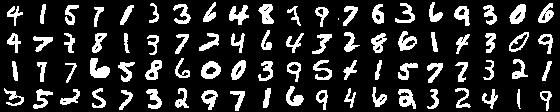

### In many ways, LeNet + MNIST is the “Hello, World” equivalent of Deep Learning for image classification

----

## Lenet Implementation

In [1]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
import argparse
import cv2



Using TensorFlow backend.
/conda/anaconda3/envs/opensource/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/conda/anaconda3/envs/opensource/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/conda/anaconda3/envs/opensource/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/conda/anaconda3/envs/open

In [2]:
#lenet architecture
class LeNet:
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses,activation="relu", weightsPath=None):
        # initialize the model
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)
        
        
        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (numChannels, imgRows, imgCols)
        
        
        # define the first set of CONV => ACTIVATION => POOL layers
        model.add(Conv2D(20, 5, padding="same",input_shape=inputShape))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        
        # define the second set of CONV => ACTIVATION => POOL layers
        model.add(Conv2D(50, 5, padding="same"))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        
        # define the first FC => ACTIVATION layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation(activation))
        
        
        # define the second FC layer
        model.add(Dense(numClasses))
        
        
        # lastly, define the soft-max classifier
        model.add(Activation("softmax"))
        
        
        # if a weights path is supplied (inicating that the model was pre-trained), then load the weights
        if weightsPath is not None:
            model.load_weights(weightsPath)
            
        # return the constructed network architecture
        return model

In [5]:
try:
    print("Please provide the path of model needs to save to a disk")
    save_model = input()
    print("Please provide the path of pre trained model needs to be loaded")
    load_model = input()
    print("Please provide path of model weight file")
    weights = input()
except:
    save_model = int(1)
    load_model = int(1)

Please provide the path of model needs to save to a disk
1
Please provide the path of pre trained model needs to be loaded
0
Please provide path of model weight file
resnet50_coco_best_v2.0.1.h5


In [6]:
print(type(save_model))
print(type(load_model))
print(type(weights))
print(save_model)
print(load_model)
print(weights)

<class 'str'>
<class 'str'>
<class 'str'>
1
0
resnet50_coco_best_v2.0.1.h5


In [7]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

[INFO] downloading MNIST...
11493376/11490434 [==============================] - 18s 2us/step


In [8]:
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
    testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
    testData = testData.reshape((testData.shape[0], 28, 28, 1))

In [9]:
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

In [10]:
# transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

In [11]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,numClasses=10,weightsPath=weights if int(load_model) > 0 else None)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

[INFO] compiling model...








In [12]:
# only train and evaluate the model if we *are not* loading a pre-existing model
if int(load_model) == 0:
    print("[INFO] training...")
    model.fit(trainData, trainLabels, batch_size=128, epochs=10,verbose=1)
    
    
    # show the accuracy on the testing set
    print("[INFO] evaluating...")
    (loss, accuracy) = model.evaluate(testData, testLabels,batch_size=128, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] training...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 59s 980us/step - loss: 0.9198 - acc: 0.7613
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2610 - acc: 0.9223
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1866 - acc: 0.9441
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1466 - acc: 0.9561
Epoch 5/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1204 - acc: 0.9643
Epoch 6/10
60000/60000 [==============================] - 57s 949us/step - loss: 0.1038 - acc: 0.9690
Epoch 7/10
60000/60000 [==============================] - 57s 943us/step - loss: 0.0906 - acc: 0.9724
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0813 - acc: 0.9761
Epoch 9/10
60000/60000 [==============================] - 58s 959us/step - loss:

In [27]:
# check to see if the model should be saved to file
if int(save_model) > 0:
    print("[INFO] dumping weights to file...")
    model.save_weights(weights, overwrite=True)

[INFO] dumping weights to file...


In [28]:
# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
    # classify the digit
    probs = model.predict(testData[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    
    # extract the image from the testData if using "channels_first" ordering
    if K.image_data_format() == "channels_first":
        image = (testData[i][0] * 255).astype("uint8")
    # otherwise we are using "channels_last" ordering
    else:
        image = (testData[i] * 255).astype("uint8")
        
    # merge the channels into one image
    image = cv2.merge([image] * 3)
    
    # resize the image from a 28 x 28 image to a 96 x 96 image so we can better see it
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    
    # show the image and prediction
    cv2.putText(image, str(prediction[0]), (5, 20),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],np.argmax(testLabels[i])))
    cv2.imshow("Digit", image)
    cv2.waitKey(0)

[INFO] Predicted: 2, Actual: 2
[INFO] Predicted: 4, Actual: 4
[INFO] Predicted: 4, Actual: 4
[INFO] Predicted: 9, Actual: 9
[INFO] Predicted: 1, Actual: 1
[INFO] Predicted: 7, Actual: 7
[INFO] Predicted: 0, Actual: 0
[INFO] Predicted: 4, Actual: 4
[INFO] Predicted: 8, Actual: 8
[INFO] Predicted: 6, Actual: 6
